# Parsing DS1000E Rigol Waveforms

**Scott Prahl**

**Feb 2020**

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

try:
    import RigolWFM.wfm as rigol

except:
    print("***** You need to install the module to read Rigol files first *****")
    print("***** Execute the following line in a new cell, then retry     *****")
    print()
    print("!{sys.executable} -m pip install RigolWFM")

## Introduction

This notebook illustrates shows how to extract signals from a `.wfm` file created by a the Rigol DS1000E scope.  It also validates that the process works by comparing with `.csv` and screenshots.

Two different `.wfm` files are examined one for the DS1052E scope and one for the DS1102E scope.  The accompanying `.csv` files seem to have t=0 in the zero in the center of the waveform. 

The list of Rigol scopes that should produce the same file format are:

In [2]:
print(rigol.DS1000E_scopes[7:])

['DS1102E', 'DS1052E', 'DS1102D', 'DS1052D']


## DS1052E

### Look at a screen shot

Start with a `.wfm` file from a Rigol DS1052E scope.  It should look something like this

<img src="https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS1052E.png" width="70%">

### Look at the data in the `.csv` file

First let's look at plot of the data from the corresponding `.csv` file. 

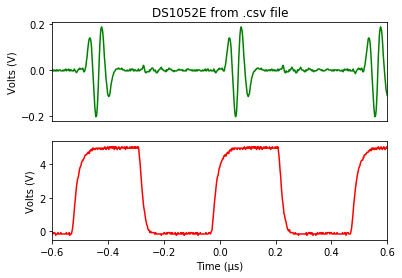

In [3]:
csv_filename_52 = "https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS1052E.csv"

csv_data = np.genfromtxt(csv_filename_52, delimiter=',', skip_header=2).T

plt.subplot(211)
plt.plot(csv_data[0]*1e6,csv_data[1], color='green')
plt.title("DS1052E from .csv file")
plt.ylabel("Volts (V)")
plt.xlim(-0.6,0.6)
plt.xticks([])

plt.subplot(212)
plt.plot(csv_data[0]*1e6,csv_data[2], color='red')
plt.xlabel("Time (µs)")
plt.ylabel("Volts (V)")
plt.xlim(-0.6,0.6)

plt.show()

### Now for the `.wfm` data

First a textual description.

In [4]:
# raw=true is needed because this is a binary file
wfm_url = "https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS1052E.wfm" + "?raw=true"  
w = rigol.Wfm.from_url(wfm_url, kind='1000E')

description = w.describe()
print(description)

downloading 'https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS1052E.wfm?raw=true'
Channel 1
    General:
         Scope = 1000E
      Firmware = unknown
       Enabled = True
    Voltage:
        Scale  = 100 mV/div
        Offset = 200 mV
      Coupling = unknown
    Time:
        Scale  = 100 ns/div
        Delay  = 0 s
        Delta  = 2 ns/point
    Data:
        Points = 8188
        Raw    = [       76,       76,       76  ...        76,       76]
        Volts  = [     4 mV,     4 mV,     4 mV  ...      4 mV,     4 mV]
        Times  = [-8.188 µs,-8.186 µs,-8.184 µs  ...  8.186 µs, 8.188 µs]
Channel 2
    General:
         Scope = 1000E
      Firmware = unknown
       Enabled = True
    Voltage:
        Scale  = 2 V/div
        Offset = -6 V
      Coupling = unknown
    Time:
        Scale  = 100 ns/div
        Delay  = 0 s
        Delta  = 2 ns/point
    Data:
        Points = 8188
        Raw    = [      203,      203,      203  ...       138,      138]
        Volts  =

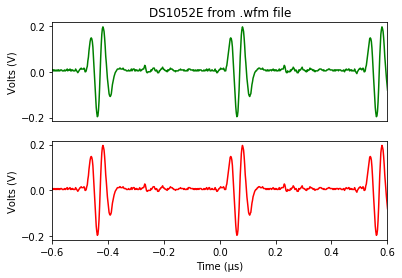

In [5]:
ch = w.channels[0]
plt.subplot(211)
plt.plot(ch.times*1e6, ch.volts, color='green')
plt.title("DS1052E from .wfm file")
plt.ylabel("Volts (V)")
plt.xlim(-0.6,0.6)

plt.xticks([])

ch = w.channels[0]
plt.subplot(212)
plt.plot(ch.times*1e6, ch.volts, color='red')
plt.xlabel("Time (µs)")
plt.ylabel("Volts (V)")
plt.xlim(-0.6,0.6)

plt.show()

## DS1102E

### First the `.csv` data

This file only has one active channel.  Let's look at what the accompanying `.csv` data looks like.

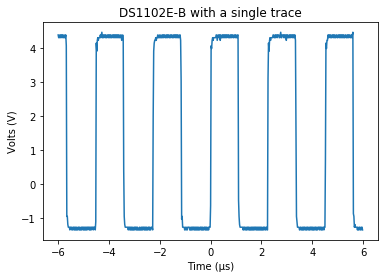

In [6]:
csv_filename = "https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS1102E-B.csv"

my_data = np.genfromtxt(csv_filename, delimiter=',', skip_header=2).T

plt.plot(my_data[0]*1e6, my_data[1])
plt.xlabel("Time (µs)")
plt.ylabel("Volts (V)")
plt.title("DS1102E-B with a single trace")
plt.show()

### Now for the `wfm` data

First let's have look at the description of the internal file structure. We see that only channel 1 has been enabled.

In [7]:
# raw=true is needed because this is a binary file
wfm_url = "https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS1102E-B.wfm" + "?raw=true"  
w = rigol.Wfm.from_url(wfm_url, kind='DS1102E')
description = w.describe()
print(description)

downloading 'https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS1102E-B.wfm?raw=true'
Channel 1
    General:
         Scope = 1000E
      Firmware = unknown
       Enabled = True
    Voltage:
        Scale  = 2 V/div
        Offset = 0 V
      Coupling = unknown
    Time:
        Scale  = 1 µs/div
        Delay  = 0 s
        Delta  = 10 ns/point
    Data:
        Points = 16380
        Raw    = [      142,      141,      141  ...        70,       70]
        Volts  = [   -1.2 V,  -1.12 V,  -1.12 V  ...    4.56 V,   4.56 V]
        Times  = [ -81.9 µs,-81.89 µs,-81.88 µs  ...  81.89 µs,  81.9 µs]



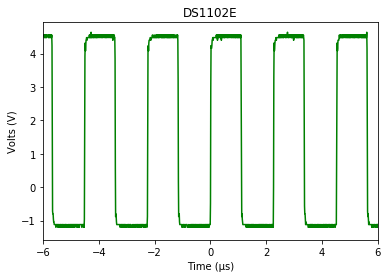

In [8]:
ch = w.channels[0]
plt.plot(ch.times*1e6,ch.volts, color='green')
plt.title("DS1102E")
plt.ylabel("Volts (V)")
plt.xlabel("Time (µs)")
plt.ylabel("Volts (V)")
plt.xlim(-6,6)
plt.show()